# PART 1

Value function under equiprobable random policy (explicit Bellman solution):
[[ 2.17  4.73  2.07  1.27  1.78]
 [ 1.12  1.78  1.17  0.74  0.56]
 [ 0.16  0.48  0.35  0.11 -0.19]
 [-0.55 -0.28 -0.28 -0.44 -0.74]
 [-1.11 -0.85 -0.81 -0.94 -1.24]]


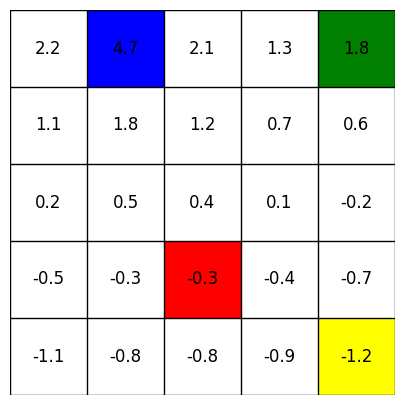

In [45]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
n_states = size * size

gamma = 0.95

# Special squares (indices)
blue = 1
green = 4
red = 17
yellow = 24

actions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
policy_prob = 0.25  # equiprobable random policy

# Build and solve the Bellman system explicitly
P = np.zeros((n_states, n_states))
r = np.zeros(n_states)

for s in range(n_states):
    if s == blue:
        r[s] = 5
        P[s, red] = 1
    elif s == green:
        r[s] = 2.5
        P[s, red] = 0.5
        P[s, yellow] = 0.5
    else:
        for a in actions:
            row, col = divmod(s, size)
            new_row = min(size - 1, max(0, row + a[0]))
            new_col = min(size - 1, max(0, col + a[1]))
            s_prime = new_row * size + new_col
            if s == yellow and s_prime == s:
                r[s] += -0.5 * policy_prob
            elif s != yellow and s_prime == s and (row + a[0] < 0 or row + a[0] >= size or col + a[1] < 0 or col + a[1] >= size):
                r[s] += -0.5 * policy_prob
            else:
                r[s] += 0 * policy_prob  # zero reward for normal moves
            P[s, s_prime] += policy_prob

# Solve (I - gamma * P) * V = r
I = np.eye(n_states)
V = np.linalg.solve(I - gamma * P, r)

# Display V reshaped as grid
print("Value function under equiprobable random policy (explicit Bellman solution):")
print(V.reshape((size, size)).round(2))

# Visualization with colors matching the described grid
import matplotlib.patches as patches

def visualize_colored_value_grid(V):
    V_grid = V.reshape((size, size))
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Base grid white
    grid_colors = np.ones((size, size, 3))
    grid_colors[:, :] = [1, 1, 1]
    
    # Apply special colors
    specials = {blue: [0, 0, 1], green: [0, 0.5, 0], red: [1, 0, 0], yellow: [1, 1, 0]}
    for idx, color in specials.items():
        row, col = divmod(idx, size)
        grid_colors[row, col] = color
    
    ax.imshow(grid_colors, extent=[0, size, 0, size])
    
    # Draw grid lines
    ax.set_xticks(np.arange(0, size+1, 1))
    ax.set_yticks(np.arange(0, size+1, 1))
    ax.grid(color='black', linewidth=1)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    
    # Overlay values
    for i in range(size):
        for j in range(size):
            ax.text(j + 0.5, size - i - 0.5, f"{V_grid[i, j]:.1f}",
                    ha='center', va='center', color='black', fontsize=12)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.show()

visualize_colored_value_grid(V)


Value function under equiprobable random policy (iterative policy evaluation):
[[ 2.17  4.73  2.07  1.27  1.78]
 [ 1.12  1.78  1.17  0.74  0.56]
 [ 0.16  0.48  0.35  0.11 -0.19]
 [-0.55 -0.28 -0.28 -0.44 -0.74]
 [-1.11 -0.85 -0.81 -0.94 -1.24]]


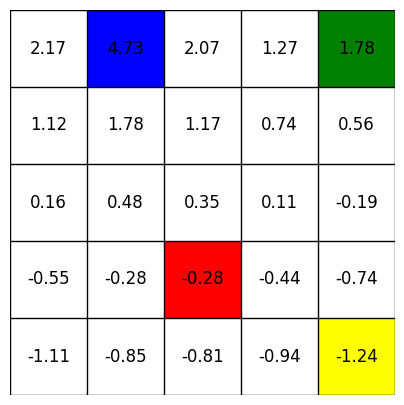

In [46]:
# Iterative Policy Evaluation for 5x5 Gridworld under equiprobable random policy

import numpy as np
import matplotlib.pyplot as plt

size = 5
n_states = size * size

gamma = 0.95
theta = 1e-6  # convergence threshold

# Special squares (indices)
blue = 1
green = 4
red = 17
yellow = 24

actions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
policy_prob = 0.25  # equiprobable random policy

# Initialize value function
V = np.zeros(n_states)

def get_transitions(s, a):
    if s == blue:
        return [(red, 5.0, 1.0)]
    elif s == green:
        return [(red, 2.5, 0.5), (yellow, 2.5, 0.5)]
    else:
        row, col = divmod(s, size)
        new_row = row + a[0]
        new_col = col + a[1]
        if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
            if s == yellow or (s != blue and s != green and s != red):
                return [(s, -0.5, 1.0)]
            else:
                return [(s, 0.0, 1.0)]
        else:
            s_prime = new_row * size + new_col
            return [(s_prime, 0.0, 1.0)]

# Iterative policy evaluation
while True:
    delta = 0
    V_new = np.zeros_like(V)
    for s in range(n_states):
        v = 0
        for a in actions:
            for (s_prime, r, p) in get_transitions(s, a):
                v += policy_prob * p * (r + gamma * V[s_prime])
        delta = max(delta, abs(v - V[s]))
        V_new[s] = v
    V = V_new
    if delta < theta:
        break

print("Value function under equiprobable random policy (iterative policy evaluation):")
print(V.reshape((size, size)).round(2))

# Visualization with colors matching the described grid
def visualize_colored_value_grid(V):
    V_grid = V.reshape((size, size))
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Base grid white
    grid_colors = np.ones((size, size, 3))
    grid_colors[:, :] = [1, 1, 1]
    
    # Apply special colors
    specials = {blue: [0, 0, 1], green: [0, 0.5, 0], red: [1, 0, 0], yellow: [1, 1, 0]}
    for idx, color in specials.items():
        row, col = divmod(idx, size)
        grid_colors[row, col] = color
    
    ax.imshow(grid_colors, extent=[0, size, 0, size])
    
    # Draw grid lines
    ax.set_xticks(np.arange(0, size+1, 1))
    ax.set_yticks(np.arange(0, size+1, 1))
    ax.grid(color='black', linewidth=1)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    
    # Overlay values
    for i in range(size):
        for j in range(size):
            ax.text(j + 0.5, size - i - 0.5, f"{V_grid[i, j]:.2f}",
                    ha='center', va='center', color='black', fontsize=12)
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    plt.show()

visualize_colored_value_grid(V)


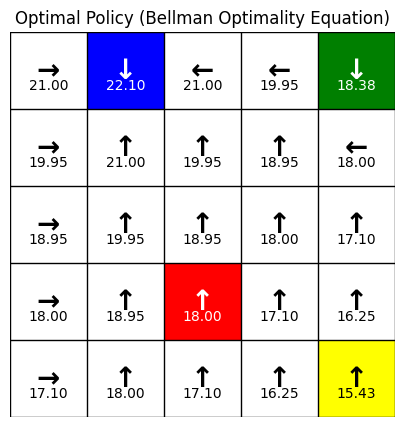

In [47]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
n_states = size * size
gamma = 0.95
actions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
action_symbols = ['↑', '↓', '←', '→']

# Special squares
blue = 1
green = 4
red = 17
yellow = 24

def state_after_action(s, a):
    row, col = divmod(s, size)
    new_row = row + a[0]
    new_col = col + a[1]
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return s  # stay if out of grid
    else:
        return new_row * size + new_col

# Bellman optimality eq - solve by iterating to convergence
V = np.zeros(n_states)
theta = 1e-6
delta = float('inf')

while delta > theta:
    delta = 0
    for s in range(n_states):
        if s == blue:
            # special: reward 5 and jump to red
            v = 5 + gamma * V[red]
        elif s == green:
            # reward 2.5, jump to red or yellow (equal prob)
            v = 2.5 + gamma * 0.5 * (V[red] + V[yellow])
        else:
            # normal states
            q_values = []
            for a in actions:
                s_prime = state_after_action(s, a)
                reward = 0
                # stepping off grid gives no movement but zero reward for normal states here
                if s == yellow and s_prime == s:
                    reward = -0.5
                elif s != yellow and s_prime == s and (state_after_action(s, a) == s):
                    reward = -0.5
                q = reward + gamma * V[s_prime]
                q_values.append(q)
            v = max(q_values)
        delta = max(delta, abs(v - V[s]))
        V[s] = v

# Extract policy from optimal value function
policy = []
for s in range(n_states):
    if s == blue:
        policy.append('↓')  # can pick arbitrary, reward happens anyway, let's choose down arrow
    elif s == green:
        policy.append('↓')  # same here, arbitrary choice
    else:
        q_values = []
        for a in actions:
            s_prime = state_after_action(s, a)
            reward = 0
            if s == yellow and s_prime == s:
                reward = -0.5
            elif s != yellow and s_prime == s and (state_after_action(s, a) == s):
                reward = -0.5
            q = reward + gamma * V[s_prime]
            q_values.append(q)
        best_action = np.argmax(q_values)
        policy.append(action_symbols[best_action])

policy_grid = np.array(policy).reshape((size, size))

# Visualization function as provided before (copy here if needed)

def visualize_policy_and_values(policy_arrows_grid, V, size=5):
    blue = 1
    green = 4
    red = 17
    yellow = 24

    specials = {blue: [0, 0, 1],      # blue
                green: [0, 0.5, 0],   # green
                red: [1, 0, 0],       # red
                yellow: [1, 1, 0]}    # yellow

    grid_colors = np.ones((size, size, 3))
    for idx, color in specials.items():
        row, col = divmod(idx, size)
        grid_colors[row, col] = color

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid_colors, extent=[0, size, 0, size])

    ax.set_xticks(np.arange(0, size + 1, 1))
    ax.set_yticks(np.arange(0, size + 1, 1))
    ax.grid(color='black', linewidth=1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)

    V_grid = V.reshape(size, size)
    for i in range(size):
        for j in range(size):
            ax.text(j + 0.5, size - i - 0.5, policy_arrows_grid[i, j],
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')
            ax.text(j + 0.5, size - i - 0.7, f"{V_grid[i, j]:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.title("Optimal Policy (Bellman Optimality Equation)")
    plt.show()

visualize_policy_and_values(policy_grid, V, size)


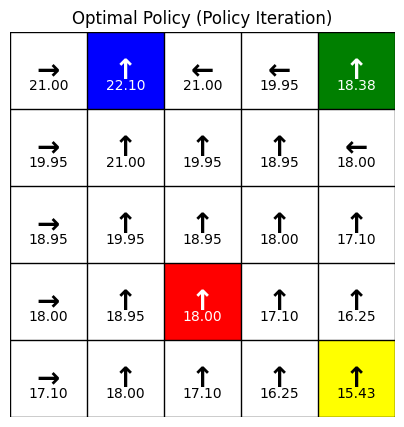

In [48]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
n_states = size * size
gamma = 0.95
actions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
action_symbols = ['↑', '↓', '←', '→']

blue = 1
green = 4
red = 17
yellow = 24

def state_after_action(s, a):
    row, col = divmod(s, size)
    new_row = row + a[0]
    new_col = col + a[1]
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return s
    else:
        return new_row * size + new_col

# Initialize policy randomly (equiprobable or fixed action)
policy = np.full(n_states, 0)  # initial action index 0 ('↑')

def policy_evaluation(policy, V_init=None, theta=1e-6):
    V = np.zeros(n_states) if V_init is None else V_init.copy()
    while True:
        delta = 0
        for s in range(n_states):
            if s == blue:
                v = 5 + gamma * V[red]
            elif s == green:
                v = 2.5 + gamma * 0.5 * (V[red] + V[yellow])
            else:
                a = policy[s]
                s_prime = state_after_action(s, actions[a])
                reward = 0
                if s == yellow and s_prime == s:
                    reward = -0.5
                elif s != yellow and s_prime == s and (state_after_action(s, actions[a]) == s):
                    reward = -0.5
                v = reward + gamma * V[s_prime]
            delta = max(delta, abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return V

def policy_improvement(V, policy):
    policy_stable = True
    new_policy = policy.copy()
    for s in range(n_states):
        if s == blue or s == green:
            continue  # policy fixed or arbitrary, skip
        q_values = []
        for a in range(len(actions)):
            s_prime = state_after_action(s, actions[a])
            reward = 0
            if s == yellow and s_prime == s:
                reward = -0.5
            elif s != yellow and s_prime == s and (state_after_action(s, actions[a]) == s):
                reward = -0.5
            q = reward + gamma * V[s_prime]
            q_values.append(q)
        best_action = np.argmax(q_values)
        if best_action != policy[s]:
            policy_stable = False
        new_policy[s] = best_action
    return new_policy, policy_stable

# Run policy iteration
policy = np.full(n_states, 0)  # initialize policy to 'up' for all
while True:
    V = policy_evaluation(policy)
    policy, stable = policy_improvement(V, policy)
    if stable:
        break

policy_arrows = [action_symbols[a] for a in policy]
policy_grid = np.array(policy_arrows).reshape((size, size))

def visualize_policy_and_values(policy_arrows_grid, V, size=5):
    blue = 1
    green = 4
    red = 17
    yellow = 24

    specials = {blue: [0, 0, 1],      # blue
                green: [0, 0.5, 0],   # green
                red: [1, 0, 0],       # red
                yellow: [1, 1, 0]}    # yellow

    grid_colors = np.ones((size, size, 3))
    for idx, color in specials.items():
        row, col = divmod(idx, size)
        grid_colors[row, col] = color

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid_colors, extent=[0, size, 0, size])

    ax.set_xticks(np.arange(0, size + 1, 1))
    ax.set_yticks(np.arange(0, size + 1, 1))
    ax.grid(color='black', linewidth=1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)

    V_grid = V.reshape(size, size)
    for i in range(size):
        for j in range(size):
            ax.text(j + 0.5, size - i - 0.5, policy_arrows_grid[i, j],
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')
            ax.text(j + 0.5, size - i - 0.7, f"{V_grid[i, j]:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.title("Optimal Policy (Policy Iteration)")
    plt.show()

visualize_policy_and_values(policy_grid, V, size)


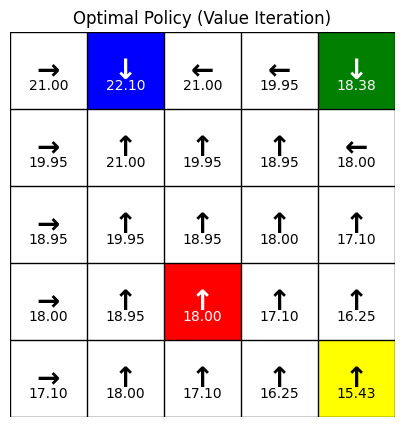

In [49]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
n_states = size * size
gamma = 0.95
actions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
action_symbols = ['↑', '↓', '←', '→']

blue = 1
green = 4
red = 17
yellow = 24

def state_after_action(s, a):
    row, col = divmod(s, size)
    new_row = row + a[0]
    new_col = col + a[1]
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return s
    else:
        return new_row * size + new_col

V = np.zeros(n_states)
theta = 1e-6
delta = float('inf')

while delta > theta:
    delta = 0
    for s in range(n_states):
        if s == blue:
            v = 5 + gamma * V[red]
        elif s == green:
            v = 2.5 + gamma * 0.5 * (V[red] + V[yellow])
        else:
            q_values = []
            for a in actions:
                s_prime = state_after_action(s, a)
                reward = 0
                if s == yellow and s_prime == s:
                    reward = -0.5
                elif s != yellow and s_prime == s and (state_after_action(s, a) == s):
                    reward = -0.5
                q = reward + gamma * V[s_prime]
                q_values.append(q)
            v = max(q_values)
        delta = max(delta, abs(v - V[s]))
        V[s] = v

policy = []
for s in range(n_states):
    if s == blue:
        policy.append('↓')  # arbitrary choice for terminal-like special
    elif s == green:
        policy.append('↓')
    else:
        q_values = []
        for a in actions:
            s_prime = state_after_action(s, a)
            reward = 0
            if s == yellow and s_prime == s:
                reward = -0.5
            elif s != yellow and s_prime == s and (state_after_action(s, a) == s):
                reward = -0.5
            q = reward + gamma * V[s_prime]
            q_values.append(q)
        best_action = np.argmax(q_values)
        policy.append(action_symbols[best_action])

policy_grid = np.array(policy).reshape((size, size))

def visualize_policy_and_values(policy_arrows_grid, V, size=5):
    blue = 1
    green = 4
    red = 17
    yellow = 24

    specials = {blue: [0, 0, 1],      # blue
                green: [0, 0.5, 0],   # green
                red: [1, 0, 0],       # red
                yellow: [1, 1, 0]}    # yellow

    grid_colors = np.ones((size, size, 3))
    for idx, color in specials.items():
        row, col = divmod(idx, size)
        grid_colors[row, col] = color

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid_colors, extent=[0, size, 0, size])

    ax.set_xticks(np.arange(0, size + 1, 1))
    ax.set_yticks(np.arange(0, size + 1, 1))
    ax.grid(color='black', linewidth=1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)

    V_grid = V.reshape(size, size)
    for i in range(size):
        for j in range(size):
            ax.text(j + 0.5, size - i - 0.5, policy_arrows_grid[i, j],
                    ha='center', va='center', fontsize=20, fontweight='bold',
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')
            ax.text(j + 0.5, size - i - 0.7, f"{V_grid[i, j]:.2f}",
                    ha='center', va='center', fontsize=10,
                    color='white' if np.mean(grid_colors[i, j]) < 0.5 else 'black')

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.title("Optimal Policy (Value Iteration)")
    plt.show()

visualize_policy_and_values(policy_grid, V, size)


# PART 2

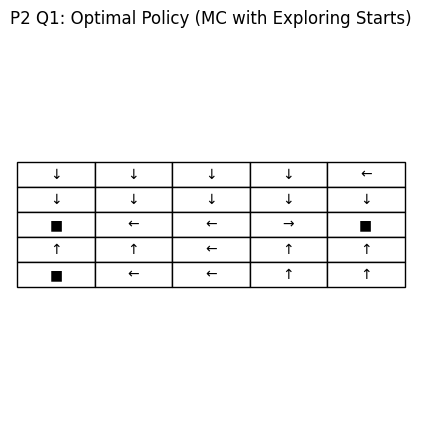

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random


# PART 2: Question 1
# Monte Carlo control with  Exploring Starts ONLY

gamma = 0.95
size = 5
n_states = size * size
blue, green, red, yellow = 1, 4, 22, 24
black = [10, 14, 20]
actions = [(-1,0), (1,0), (0,-1), (0,1)]
epsilon = 0.1

def step(state, action_idx):
    if state in black:
        return state, 0, True
    row, col = divmod(state, size)
    dr, dc = actions[action_idx]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return state, -0.5, False
    new_state = new_row * size + new_col
    if state == blue:
        return red, -0.2, False
    if state == green:
        dest = np.random.choice([yellow, red])
        return dest, -0.2, False
    if new_state in black:
        return new_state, 0, True
    return new_state, -0.2, False

def mc_control_exploring_starts(episodes=5000):
    Q = np.zeros((n_states, 4))
    returns = [[[] for _ in range(4)] for _ in range(n_states)]
    policy = np.ones((n_states, 4)) / 4
    for ep in range(episodes):
        state = np.random.choice([s for s in range(n_states) if s not in black])
        action = np.random.choice(4)
        episode = []
        while True:
            next_state, reward, done = step(state, action)
            episode.append((state, action, reward))
            if done:
                break
            action = np.random.choice(4, p=policy[next_state])
            state = next_state
        G = 0
        visited = set()
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns[state][action].append(G)
                Q[state, action] = np.mean(returns[state][action])
                best_action = np.argmax(Q[state])
                policy[state] = epsilon / 4
                policy[state, best_action] += 1 - epsilon
                visited.add((state, action))
    return Q, policy

def plot_policy(policy, title):
    arrows = ['↑', '↓', '←', '→']
    grid = np.empty((size, size), dtype='<U2')
    for s in range(n_states):
        row, col = divmod(s, size)
        if s in black:
            grid[row, col] = '■'
        else:
            best_a = np.argmax(policy[s])
            grid[row, col] = arrows[best_a]
    plt.figure(figsize=(5, 5))
    tb = plt.table(cellText=grid, loc='center', cellLoc='center')
    tb.scale(1, 1.5)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Run and visualize (1) Exploring Starts ONLY
Q_es, policy_es = mc_control_exploring_starts()
plot_policy(policy_es, "P2 Q1: Optimal Policy (MC with Exploring Starts)")


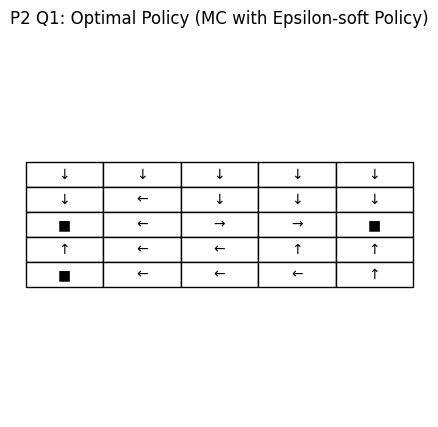

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# PART 2: Question 1
# Monte Carlo control with:
# (2) Epsilon-soft policy WITHOUT exploring starts


gamma = 0.95
size = 5
n_states = size * size
blue, green, red, yellow = 1, 4, 22, 24
black = [10, 14, 20]
actions = [(-1,0), (1,0), (0,-1), (0,1)]
epsilon = 0.1

def step(state, action_idx):
    if state in black:
        return state, 0, True
    row, col = divmod(state, size)
    dr, dc = actions[action_idx]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return state, -0.5, False
    new_state = new_row * size + new_col
    if state == blue:
        return red, -0.2, False
    if state == green:
        dest = np.random.choice([yellow, red])
        return dest, -0.2, False
    if new_state in black:
        return new_state, 0, True
    return new_state, -0.2, False

def mc_control_epsilon_soft(episodes=5000):
    Q = np.zeros((n_states, 4))
    returns = [[[] for _ in range(4)] for _ in range(n_states)]
    policy = np.ones((n_states, 4)) / 4
    for ep in range(episodes):
        state = np.random.choice([s for s in range(n_states) if s not in black])
        episode = []
        while True:
            action = np.random.choice(4, p=policy[state])
            next_state, reward, done = step(state, action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        G = 0
        visited = set()
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns[state][action].append(G)
                Q[state, action] = np.mean(returns[state][action])
                best_action = np.argmax(Q[state])
                policy[state] = epsilon / 4
                policy[state, best_action] += 1 - epsilon
                visited.add((state, action))
    return Q, policy

def plot_policy(policy, title):
    arrows = ['↑', '↓', '←', '→']
    grid = np.empty((size, size), dtype='<U2')
    for s in range(n_states):
        row, col = divmod(s, size)
        if s in black:
            grid[row, col] = '■'
        else:
            best_a = np.argmax(policy[s])
            grid[row, col] = arrows[best_a]
    plt.figure(figsize=(5, 5))
    tb = plt.table(cellText=grid, loc='center', cellLoc='center')
    tb.scale(1, 1.5)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Run and visualize (2) Epsilon-soft policy WITHOUT exploring starts
Q_eps, policy_eps = mc_control_epsilon_soft()
plot_policy(policy_eps, "P2 Q1: Optimal Policy (MC with Epsilon-soft Policy)")


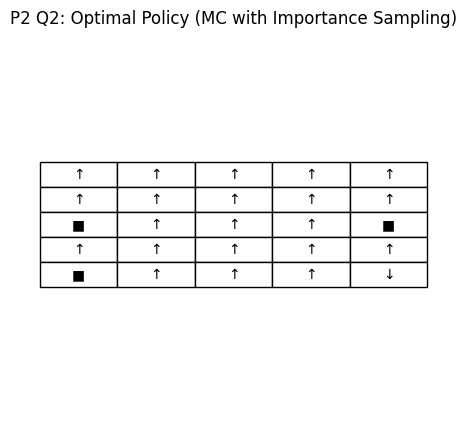

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# PART 2: Question 2
# Monte Carlo with importance sampling using equiprobable behaviour policy


gamma = 0.95
size = 5
n_states = size * size
blue, green, red, yellow = 1, 4, 22, 24
black = [10, 14, 20]
actions = [(-1,0), (1,0), (0,-1), (0,1)]


def step(state, action_idx):
    if state in black:
        return state, 0, True
    row, col = divmod(state, size)
    dr, dc = actions[action_idx]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= size or new_col < 0 or new_col >= size:
        return state, -0.5, False
    new_state = new_row * size + new_col
    if state == blue:
        return red, -0.2, False
    if state == green:
        dest = np.random.choice([yellow, red])
        return dest, -0.2, False
    if new_state in black:
        return new_state, 0, True
    return new_state, -0.2, False

def mc_control_importance_sampling(episodes=5000):
    Q = np.zeros((n_states, 4))
    C = np.zeros((n_states, 4))
    target_policy = np.ones((n_states, 4)) / 4  # will improve to greedy
    behaviour_policy = np.ones((n_states, 4)) / 4  # equiprobable
    
    for ep in range(episodes):
        state = np.random.choice([s for s in range(n_states) if s not in black])
        episode = []
        while True:
            action = np.random.choice(4, p=behaviour_policy[state])
            next_state, reward, done = step(state, action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        G = 0
        W = 1
        for state, action, reward in reversed(episode):
            G = gamma * G + reward
            C[state, action] += W
            Q[state, action] += (W / C[state, action]) * (G - Q[state, action])
            best_action = np.argmax(Q[state])
            target_policy[state] = 0
            target_policy[state, best_action] = 1
            if action != best_action:
                break
            W = W * 1 / 0.25  # behaviour prob / target prob
    return Q, target_policy

def plot_policy(policy, title):
    arrows = ['↑', '↓', '←', '→']
    grid = np.empty((size, size), dtype='<U2')
    for s in range(n_states):
        row, col = divmod(s, size)
        if s in black:
            grid[row, col] = '■'
        else:
            best_a = np.argmax(policy[s])
            grid[row, col] = arrows[best_a]
    plt.figure(figsize=(5, 5))
    tb = plt.table(cellText=grid, loc='center', cellLoc='center')
    tb.scale(1, 1.5)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Run and visualize P2 Q2
Q_is, policy_is = mc_control_importance_sampling()
plot_policy(policy_is, "P2 Q2: Optimal Policy (MC with Importance Sampling)")
